# Graph

## 필요 라이브러리 로드

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [178]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [179]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [180]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

In [181]:
import glob
import shutil

## 파일 불러오기

In [182]:
site_name = 'vibe'

In [183]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [184]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [185]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/mod_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [186]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_vibe_20220405.xlsx
1 live_vibe_20220406.xlsx
2 live_vibe_20220407.xlsx
3 live_vibe_20220412.xlsx
4 live_vibe_20220413.xlsx
5 live_vibe_20220413_154819.xlsx
6 live_vibe_20220414_134945.xlsx
7 live_vibe_20220415_180611.xlsx
8 live_vibe_20220418_111004.xlsx
9 live_vibe_20220419_110642.xlsx
10 live_vibe_20220420_110627.xlsx
11 live_vibe_20220421_110704.xlsx
12 live_vibe_20220422_110647.xlsx
13 live_vibe_20220425_110704.xlsx
14 live_vibe_20220426_110637.xlsx
15 live_vibe_20220427_110635.xlsx
16 live_vibe_20220428_110605.xlsx
17 live_vibe_20220429_110625.xlsx
18 live_vibe_20220430_110605.xlsx
19 live_vibe_20220501_110605.xlsx
20 live_vibe_20220502_110605.xlsx
21 live_vibe_20220503_110605.xlsx
22 live_vibe_20220504_110605.xlsx
23 live_vibe_20220505_110605.xlsx
24 live_vibe_20220506_110605.xlsx
25 live_vibe_20220507_110630.xlsx
26 live_vibe_20220508_110605.xlsx
27 live_vibe_20220509_110605.xlsx
28 live_vibe_20220510_110604.xlsx


## 수집한 파일 모두 합치기

In [187]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

,사이트,날짜,순위,곡,가수,앨범,소속사,소속사_분류
0,vibe,2022-04-05 00:00:00,1,TOMBOY,(여자) 아이들,I NEVER DIE,CUBE,기타
1,vibe,2022-04-05 00:00:00,2,Feel My Rhythm,Red Velvet (레드벨벳),'The ReVe Festival 2022 - Feel My Rhythm',SM,SM
2,vibe,2022-04-05 00:00:00,3,GANADARA (Feat. 아이유),박재범,GANADARA,MORE VISION,기타
3,vibe,2022-04-05 00:00:00,4,INVU,태연 (TAEYEON),INVU - The 3rd Album,SM,SM
4,vibe,2022-04-05 00:00:00,5,RUN2U,STAYC(스테이씨),YOUNG-LUV.COM,HIGH UP,기타


In [188]:
df['날짜'] = df['날짜'].astype(str)

In [189]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

,사이트,날짜,순위,곡,가수,앨범,소속사,소속사_분류
0,vibe,2022-05-02,1,LOVE DIVE,IVE(아이브),LOVE DIVE,스타쉽,스타쉽
1,vibe,2022-05-02,2,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),YG,YG
2,vibe,2022-05-02,3,TOMBOY,(여자) 아이들,I NEVER DIE,CUBE,기타
3,vibe,2022-05-02,4,Feel My Rhythm,Red Velvet (레드벨벳),'The ReVe Festival 2022 - Feel My Rhythm',SM,SM
4,vibe,2022-05-02,5,사랑인가 봐,멜로망스(Melomance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),ABYSS,기타


In [190]:
sliced_df.tail()

,사이트,날짜,순위,곡,가수,앨범,소속사,소속사_분류
702,vibe,2022-05-08,97,BOP BOP!,VIVIZ(비비지),The 1st Mini Album 'Beam Of Prism',빅플래닛메이드,기타
703,vibe,2022-05-08,97,BOP BOP!,VIVIZ(비비지),The 1st Mini Album 'Beam Of Prism',스윙,스윙
704,vibe,2022-05-08,98,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타
705,vibe,2022-05-08,99,Queendom,Red Velvet (레드벨벳),Queendom - The 6th Mini Album,SM,SM
706,vibe,2022-05-08,100,With you,지민,우리들의 블루스 OST Part 4,빅히트,빅히트


In [191]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     707 non-null    object
 1   날짜      707 non-null    object
 2   순위      707 non-null    int64 
 3   곡       707 non-null    object
 4   가수      707 non-null    object
 5   앨범      707 non-null    object
 6   소속사     707 non-null    object
 7   소속사_분류  707 non-null    object
dtypes: int64(1), object(7)
memory usage: 44.3+ KB


In [192]:
sliced_df[sliced_df['소속사'].isna() == True]

,사이트,날짜,순위,곡,가수,앨범,소속사,소속사_분류


### 수집한 곡의 유니크

In [193]:
len(sliced_df['곡'].unique())

106

In [194]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

,날짜
0,2022-05-02
1,2022-05-03
2,2022-05-04
3,2022-05-05
4,2022-05-06
5,2022-05-07
6,2022-05-08


### 제목과 가수 매칭 값 추출

In [195]:
sort_df = sliced_df[['곡', '가수']]
sort_df

,곡,가수
0,LOVE DIVE,IVE(아이브)
1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
2,TOMBOY,(여자) 아이들
3,Feel My Rhythm,Red Velvet (레드벨벳)
4,사랑인가 봐,멜로망스(Melomance)
...,...,...
702,BOP BOP!,VIVIZ(비비지)
703,BOP BOP!,VIVIZ(비비지)
704,사랑을 사랑하게 될 때까지,잔나비 최정훈
705,Queendom,Red Velvet (레드벨벳)


In [196]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

,곡,가수
0,LOVE DIVE,IVE(아이브)
1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
2,TOMBOY,(여자) 아이들
3,Feel My Rhythm,Red Velvet (레드벨벳)
4,사랑인가 봐,멜로망스(Melomance)
...,...,...
101,다시 만날 수 있을까,임영웅
102,봄 to 러브,10CM
103,감동이야 (feat. 성시경),싸이 (PSY)
104,이제는 (feat. 화사),싸이 (PSY)


### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [197]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    site = merged_df['사이트'].value_counts().index[0]
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    agency = merged_df['소속사'].value_counts().index[0]
    agency_type = merged_df['소속사_분류'].value_counts().index[0]
    merged_df['사이트'] = merged_df['사이트'].fillna(site)
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    merged_df['소속사'] = merged_df['소속사'].fillna(agency)
    merged_df['소속사_분류'] = merged_df['소속사_분류'].fillna(agency_type)
    song_df_list.append(merged_df)

In [198]:
merged_df

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동
0,2022-05-02,vibe,NaN,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,NaN
1,2022-05-03,vibe,NaN,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,NaN
2,2022-05-04,vibe,NaN,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,NaN
3,2022-05-05,vibe,NaN,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,NaN
4,2022-05-06,vibe,NaN,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,NaN
5,2022-05-07,vibe,NaN,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,NaN
6,2022-05-08,vibe,98.0,사랑을 사랑하게 될 때까지,잔나비 최정훈,사랑을 사랑하게 될 때까지,페포니 뮤직,기타,0.0


### 노래 개수

In [199]:
len(song_df_list)

106

## 그래프 테스트

### 노래 선택

In [200]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   사이트     7 non-null      object
 2   순위      7 non-null      int64 
 3   곡       7 non-null      object
 4   가수      7 non-null      object
 5   앨범      7 non-null      object
 6   소속사     7 non-null      object
 7   소속사_분류  7 non-null      object
 8   순위변동    7 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 560.0+ bytes


In [201]:
tmp = song_df_list[100]
tmp

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동
0,2022-05-02,vibe,NaN,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,NaN
1,2022-05-03,vibe,NaN,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,NaN
2,2022-05-04,vibe,60.0,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,0.0
3,2022-05-05,vibe,46.0,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,14.0
4,2022-05-06,vibe,42.0,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,4.0
5,2022-05-07,vibe,38.0,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,4.0
6,2022-05-08,vibe,36.0,FEARLESS,LE SSERAFIM (르세라핌),FEARLESS,SOURCE MUSIC,기타,2.0


In [202]:
tmp['곡'].value_counts().index.values[0]

'FEARLESS'

In [203]:
tmp['가수'].value_counts().index.values[0]

'LE SSERAFIM (르세라핌)'

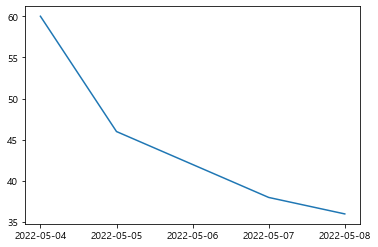

In [204]:
plt.plot(tmp['날짜'], tmp['순위'])

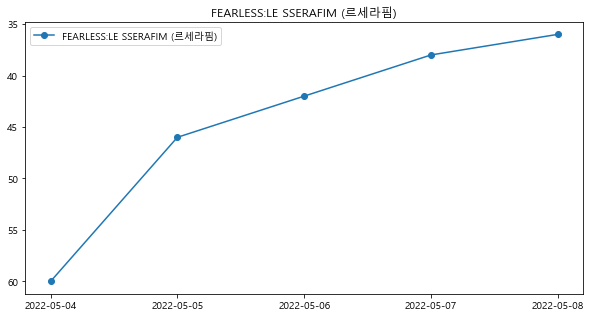

In [205]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [206]:
temp_df = song_df_list[70:91]

### 그래프

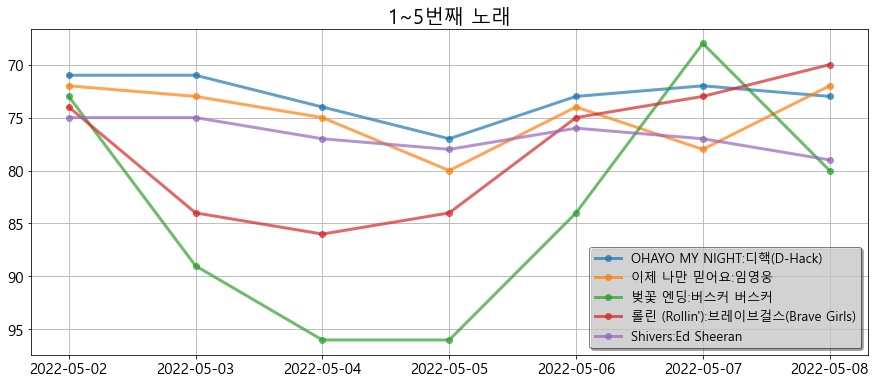

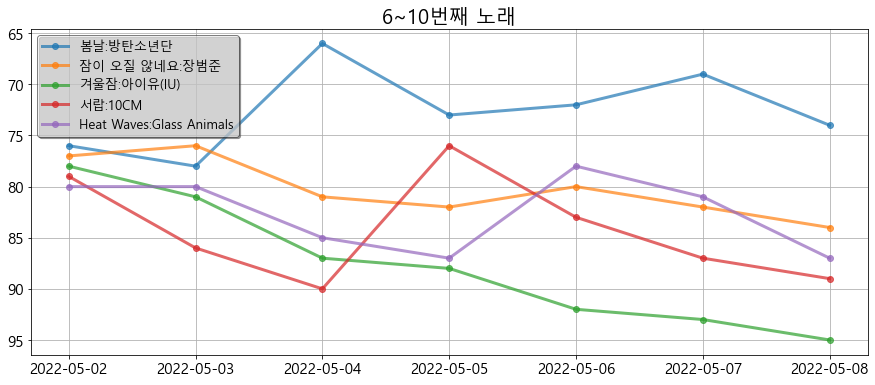

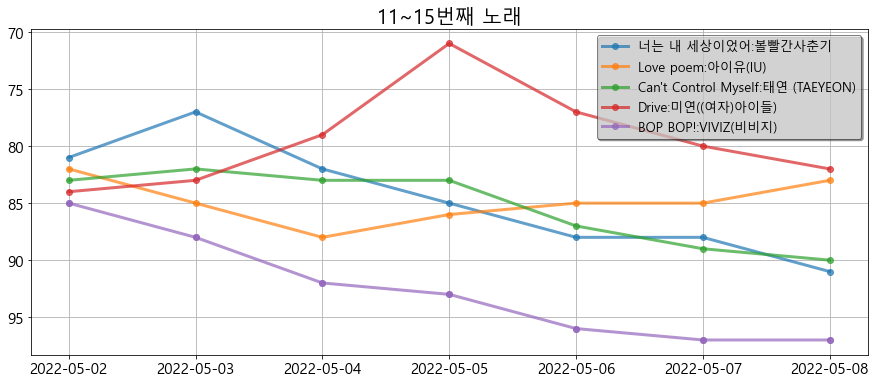

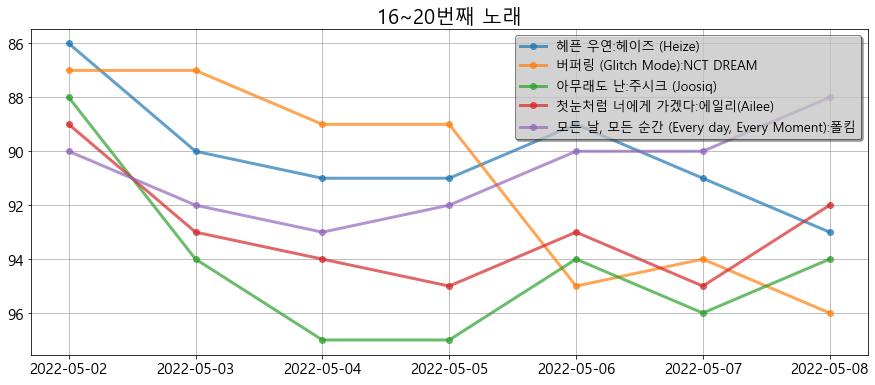

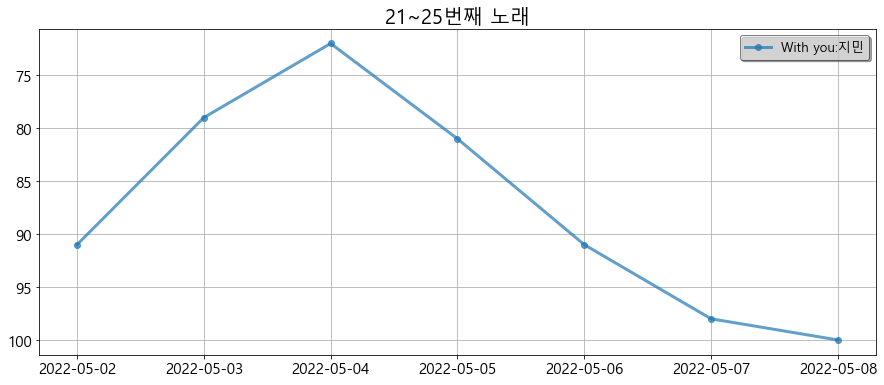

In [207]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [208]:
code_path

'c:/data/Wantreez/Crawling/music'

In [209]:
save_folder = f'/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
save_folder

'/crawled_data/outlier_data/2022-05-02_2022-05-08/vibe/'

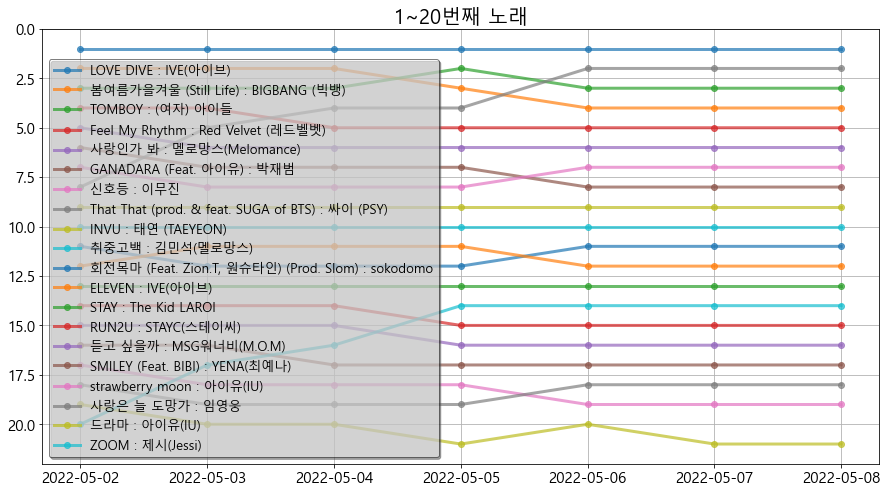

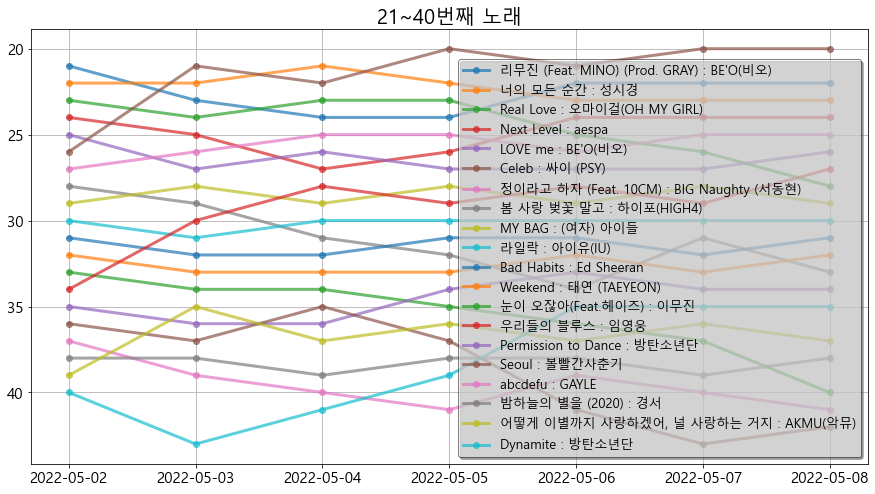

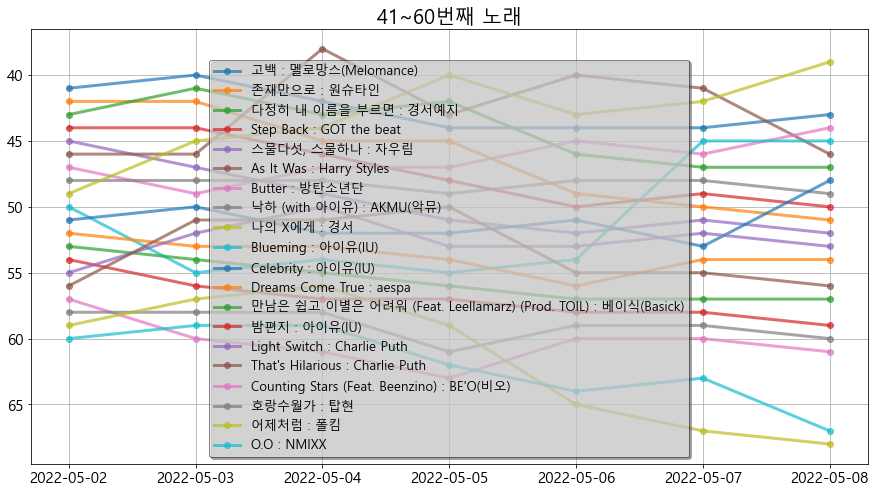

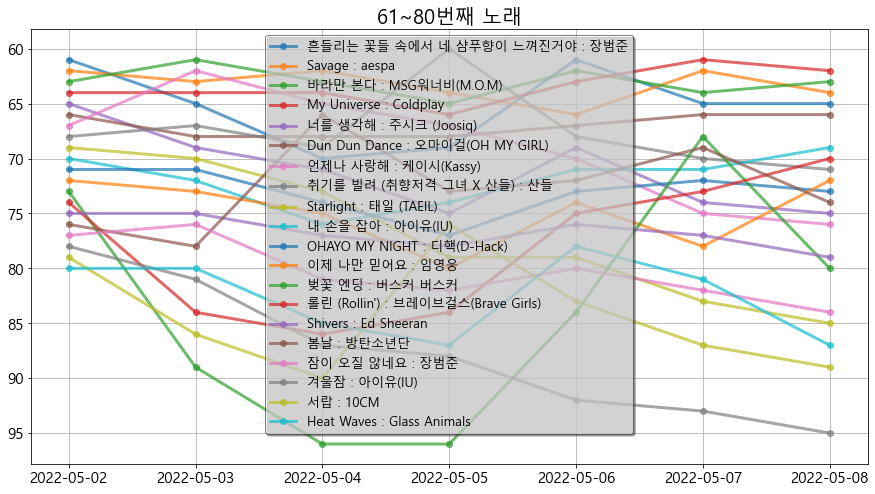

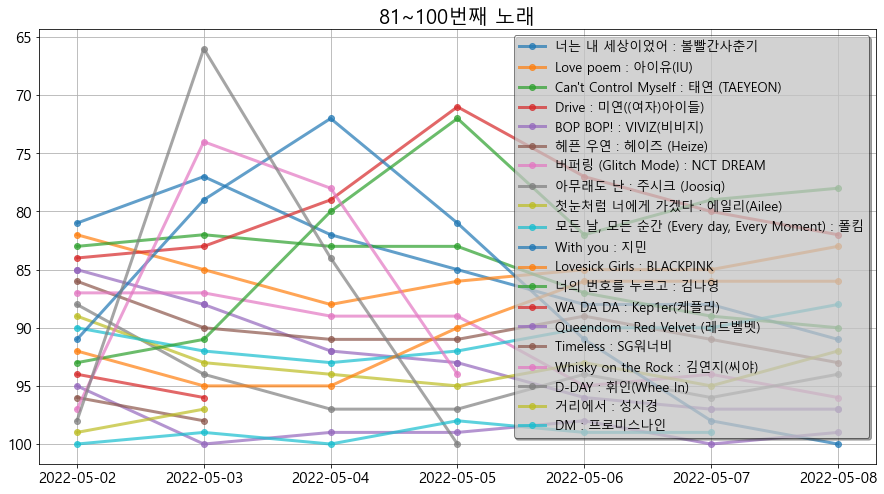

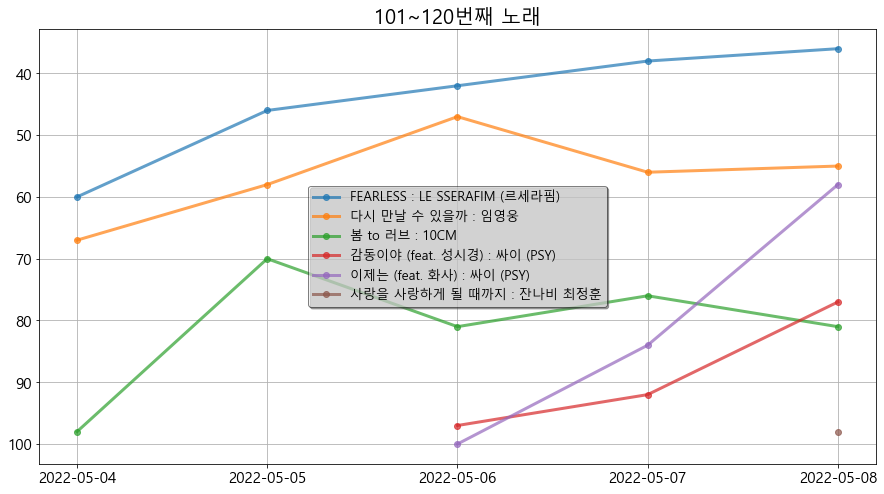

In [210]:
number = 20
t = 0
for i in range( math.ceil(len(song_df_list)/number) ):
    plt.figure( figsize=(15, 8) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = song_df_list[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ' : ' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True);
    plt.savefig(code_path + save_folder + f'{start_date}_{end_date}_그래프{t:0>2}.png')

### 순위 변동 그래프

In [211]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' - ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

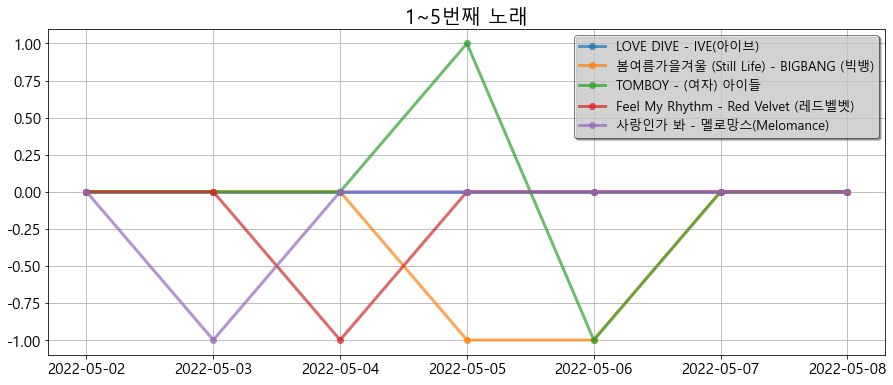

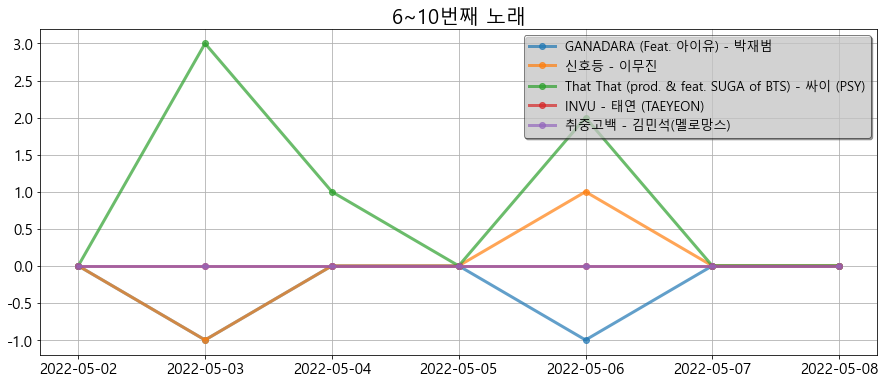

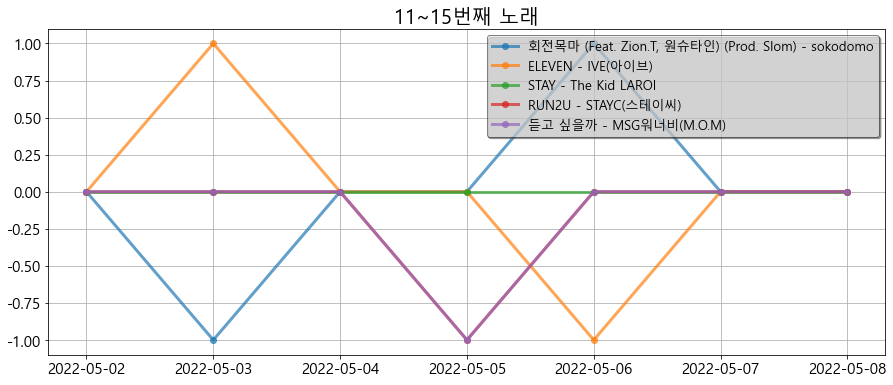

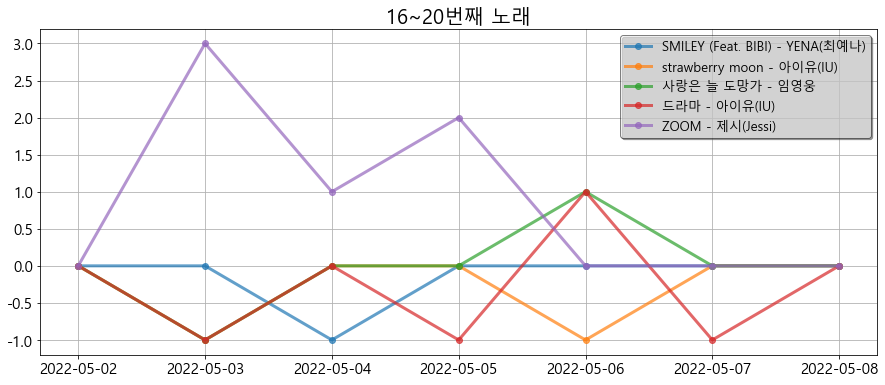

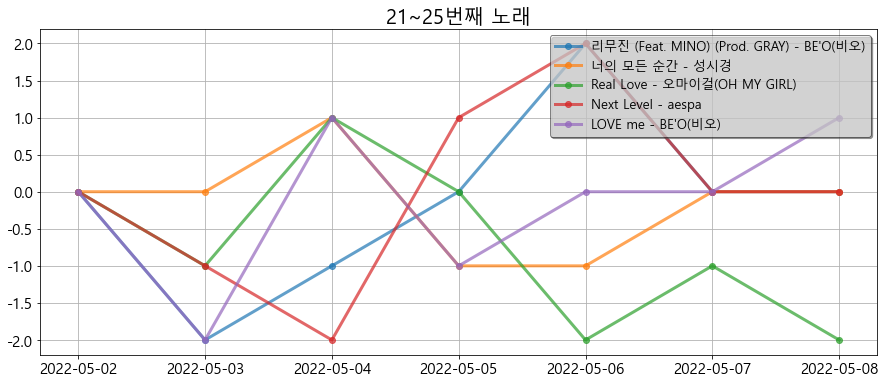

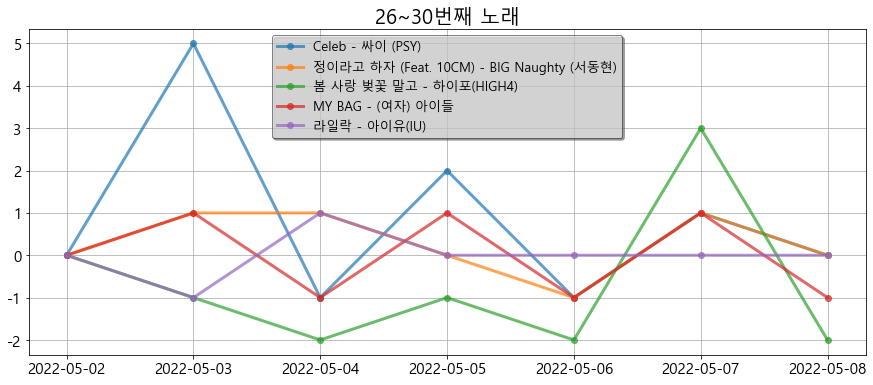

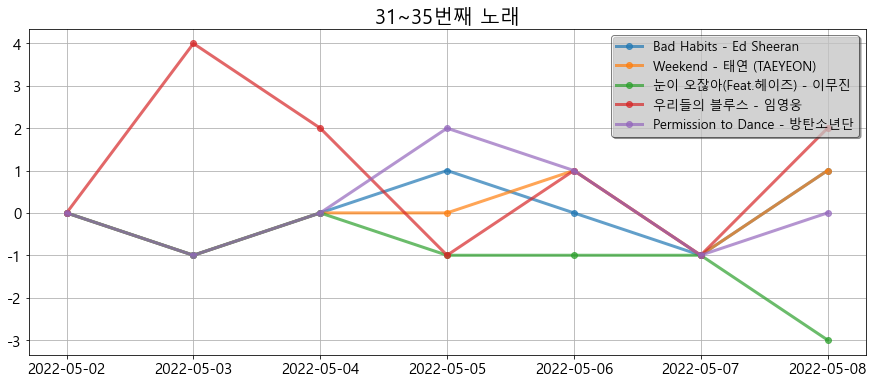

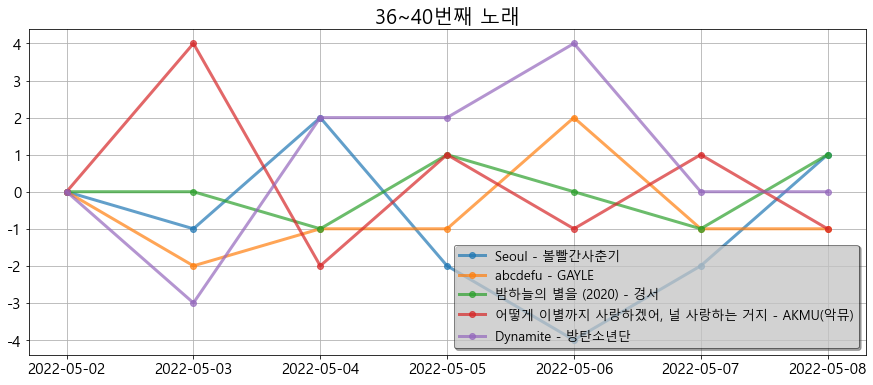

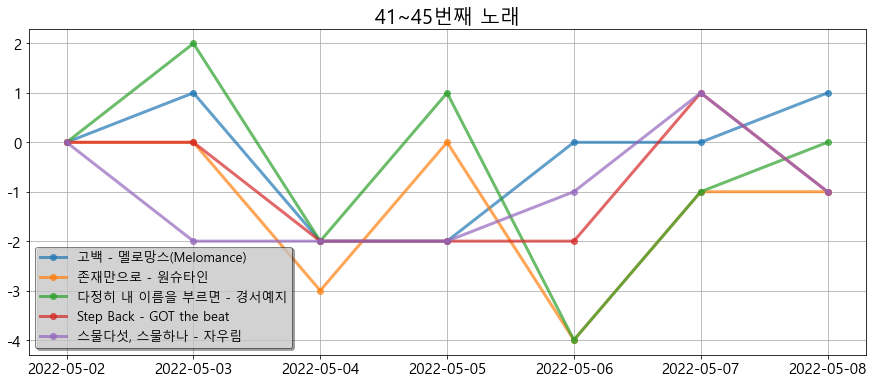

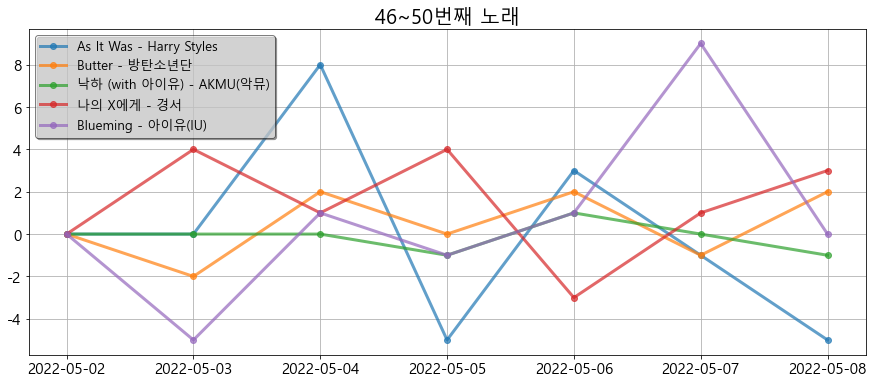

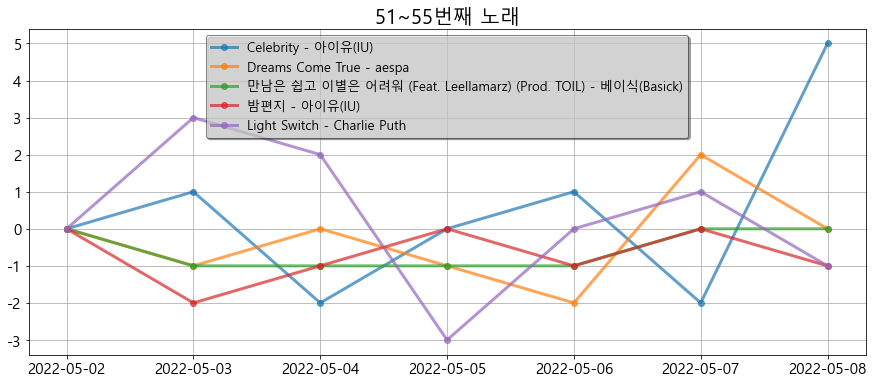

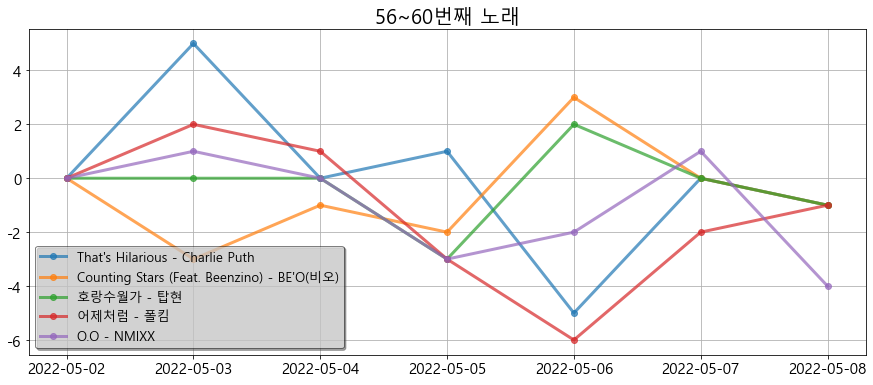

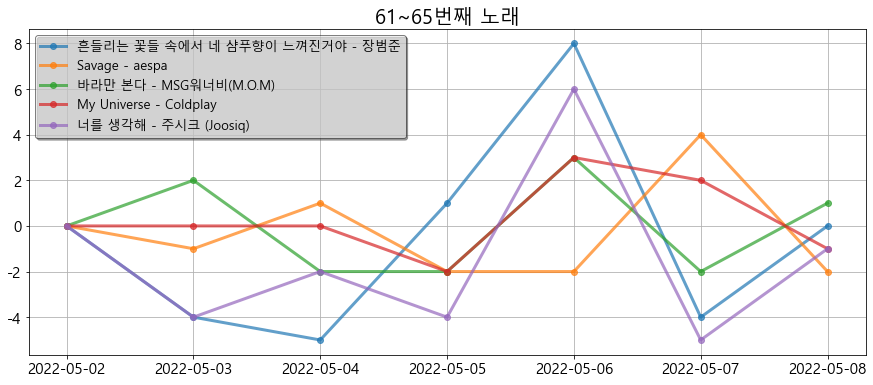

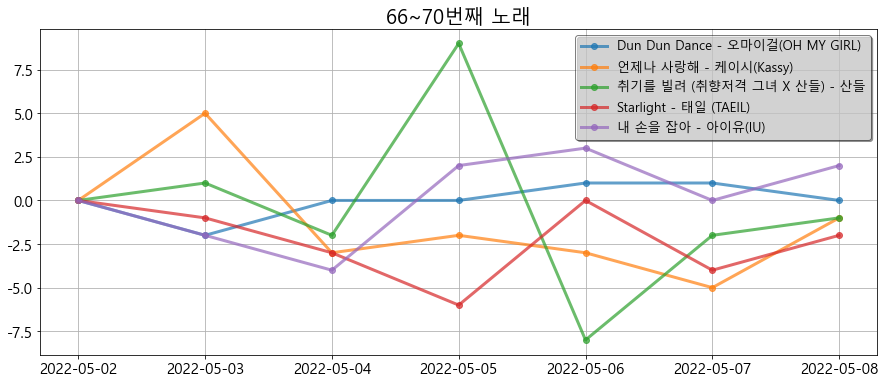

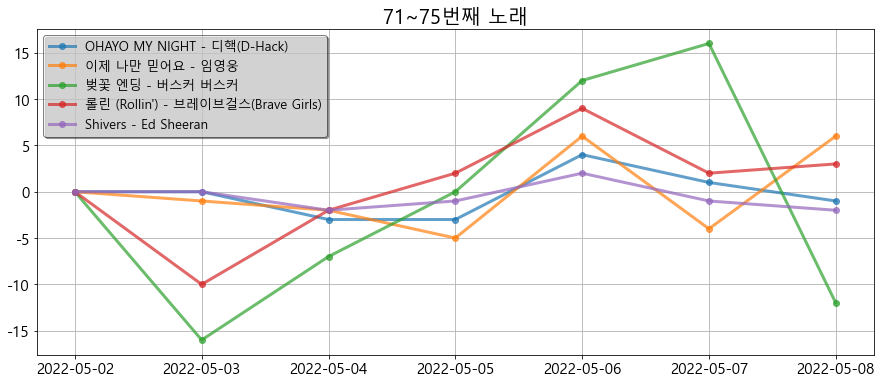

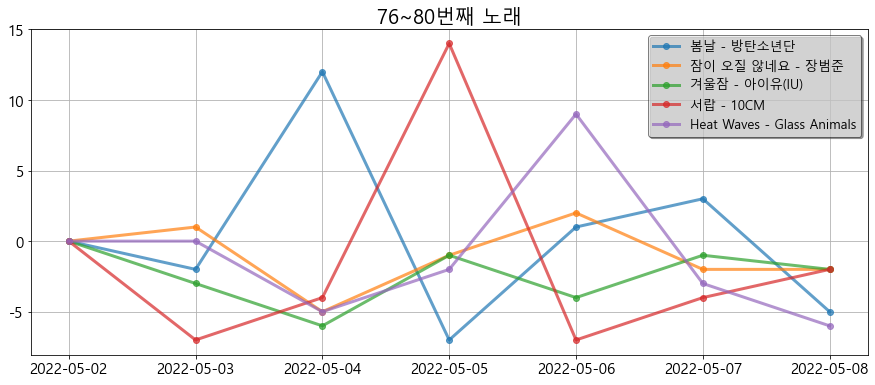

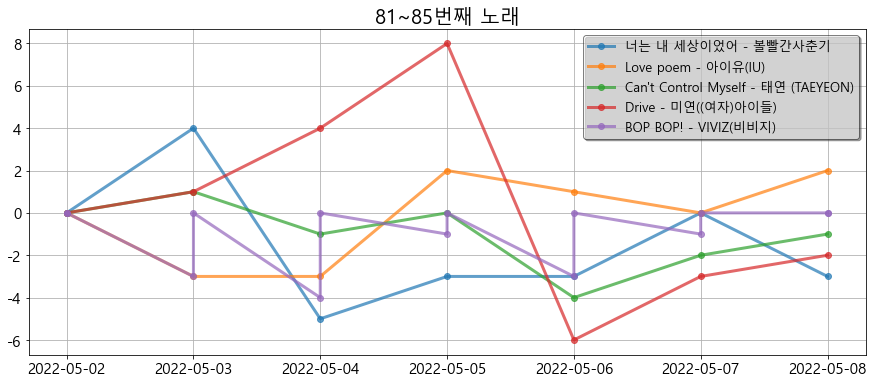

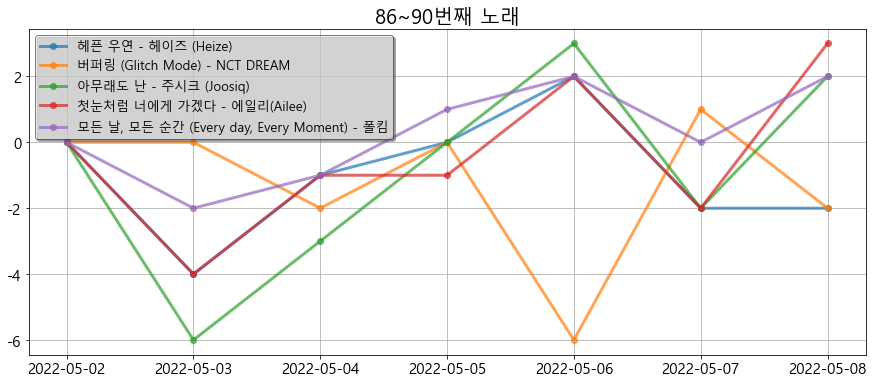

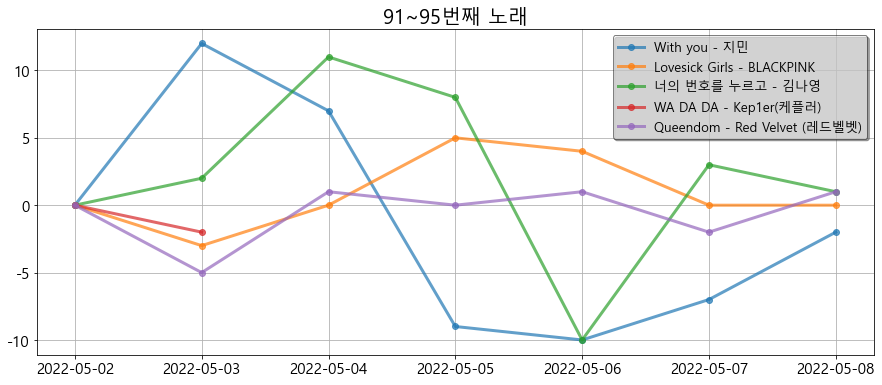

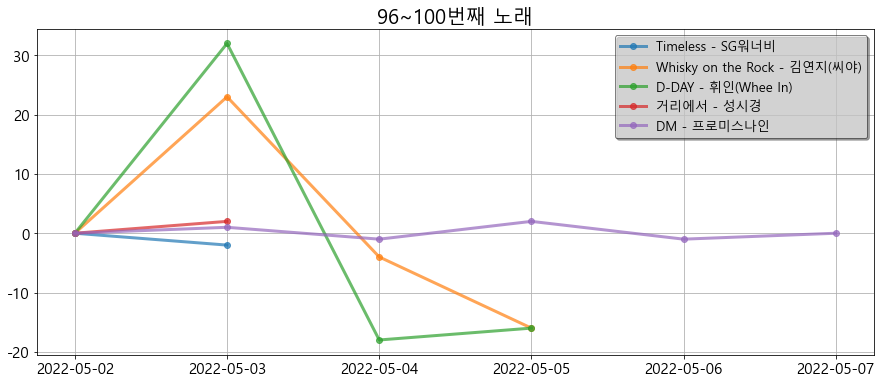

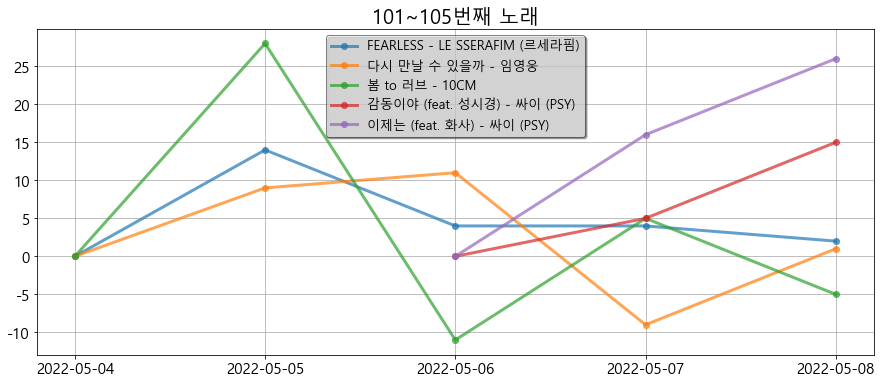

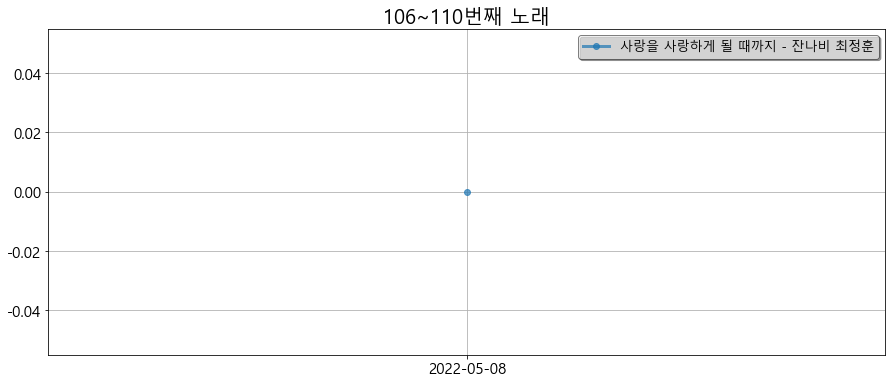

In [212]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [213]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [214]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      749 non-null    object 
 1   사이트     749 non-null    object 
 2   순위      707 non-null    float64
 3   곡       749 non-null    object 
 4   가수      749 non-null    object 
 5   앨범      749 non-null    object 
 6   소속사     749 non-null    object 
 7   소속사_분류  749 non-null    object 
 8   순위변동    707 non-null    float64
dtypes: float64(2), object(7)
memory usage: 52.8+ KB


In [215]:
total_df['순위변동'].describe()

count    707.000000
mean      -0.090523
std        3.762083
min      -18.000000
25%       -1.000000
50%        0.000000
75%        0.000000
max       32.000000
Name: 순위변동, dtype: float64

In [216]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    169.000000
mean       3.662722
std        4.936366
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       32.000000
Name: 순위변동, dtype: float64

In [217]:
# Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
# Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
# IQR = Q3 - Q1
# u_outlier = Q3 + 1.5*IQR
# print(Q1, Q3, IQR, u_outlier)

In [218]:
u_outlier = 30

### 이상치 곡 추출

In [219]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동
0,2022-05-03,vibe,66.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,32.0


In [220]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 1


### 급등 음원의 샘플 추출

In [221]:
big_change_title_list = outlier_df['곡'].tolist()
big_change_artist_list = outlier_df['가수'].tolist()
print('이상치 곡의 개수 :', len(big_change_title_list) )
print(big_change_title_list)
print('이상치 가수의 개수 :', len(big_change_title_list) )
print(big_change_artist_list)

이상치 곡의 개수 : 1
['D-DAY']
이상치 가수의 개수 : 1
['휘인(Whee In)']


#### 이상치 곡 순위변동 평균

In [222]:
mean_change_list = []
for j in range( len(big_change_title_list) ):
        temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        num = temp[temp['순위변동'] > 0 ].mean()['순위변동']
        row = temp.shape[0]
        temp['순위변동평균(양수)'] = num
        # 컬럼 자료가 온전히 있는 1행만 필요
        mean_change_list.append(temp)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_3680/3988431056.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num = temp[temp['순위변동'] > 0 ].mean()['순위변동']


In [223]:
mean_change_list[0]

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-02,vibe,98.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,0.0,32.0
1,2022-05-03,vibe,66.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,32.0,32.0
2,2022-05-04,vibe,84.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,-18.0,32.0
3,2022-05-05,vibe,100.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,-16.0,32.0
4,2022-05-06,vibe,NaN,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,NaN,32.0
5,2022-05-07,vibe,NaN,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,NaN,32.0
6,2022-05-08,vibe,NaN,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,NaN,32.0


In [224]:
mean_outlier_df = pd.DataFrame()
for one in mean_change_list:
    temp = one.iloc[0:1, :]
    mean_outlier_df = pd.concat([mean_outlier_df, temp], ignore_index=True)

In [225]:
mean_outlier_df.head()

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-02,vibe,98.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,0.0,32.0


In [226]:
mean_outlier_df.tail()

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-02,vibe,98.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,0.0,32.0


In [227]:
mod_mean_outlier_df = mean_outlier_df[mean_outlier_df['순위변동평균(양수)'] > u_outlier].reset_index(drop=True)
mod_mean_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          1 non-null      object 
 1   사이트         1 non-null      object 
 2   순위          1 non-null      float64
 3   곡           1 non-null      object 
 4   가수          1 non-null      object 
 5   앨범          1 non-null      object 
 6   소속사         1 non-null      object 
 7   소속사_분류      1 non-null      object 
 8   순위변동        1 non-null      float64
 9   순위변동평균(양수)  1 non-null      float64
dtypes: float64(3), object(7)
memory usage: 208.0+ bytes


In [228]:
mod_mean_outlier_df['순위변동평균(양수)'] = round(mod_mean_outlier_df['순위변동평균(양수)'], 1)

In [229]:
mod_mean_outlier_df

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-02,vibe,98.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,0.0,32.0


In [230]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')

path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

In [231]:
# 이상치 곡 평균 df 출력
mod_mean_outlier_df.to_excel(path + f'[{site_name}]{mod_start_date}_{mod_end_date}_mean_outliers.xlsx', index=False)
print(f'[{site_name}]{mod_start_date}_{mod_end_date}_mean_outliers.xlsx 출력')

[vibe]20220502_20220508_mean_outliers.xlsx 출력


##### 그래프

In [232]:
import seaborn as sns

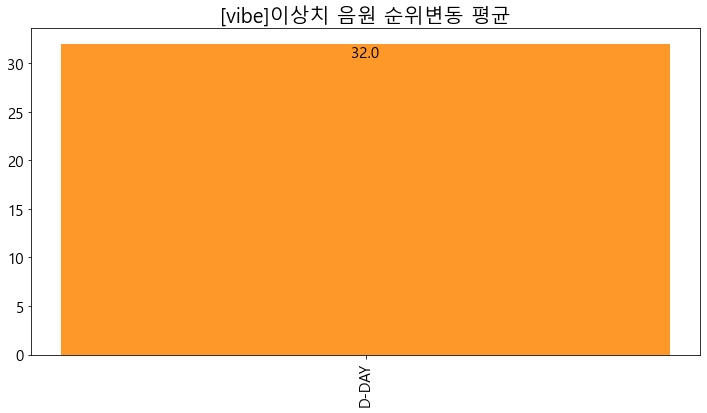

In [233]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('YlOrBr', mod_mean_outlier_df.shape[0])
plt.bar('곡', '순위변동평균(양수)', data=mod_mean_outlier_df, color=colors)
plt.title(f'[{site_name}]이상치 음원 순위변동 평균', fontdict={'size':20})
for i in range(mod_mean_outlier_df.shape[0]):
    plt.text(i, mod_mean_outlier_df['순위변동평균(양수)'][i] - mod_mean_outlier_df.shape[0]*0.1, round(mod_mean_outlier_df['순위변동평균(양수)'][i], 1), verticalalignment='top', horizontalalignment='center', fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15);

### 이상치 곡의 순위 그래프

In [234]:
mod_mean_outlier_df

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-02,vibe,98.0,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,0.0,32.0


In [235]:
mod_big_change_title_list = mod_mean_outlier_df['곡'].tolist()
mod_big_change_artist_list = mod_mean_outlier_df['가수'].tolist()
print('이상치 곡의 개수 :', len(mod_big_change_title_list) )
print(mod_big_change_title_list)
print('이상치 가수의 개수 :', len(mod_big_change_artist_list) )
print(mod_big_change_artist_list)

이상치 곡의 개수 : 1
['D-DAY']
이상치 가수의 개수 : 1
['휘인(Whee In)']


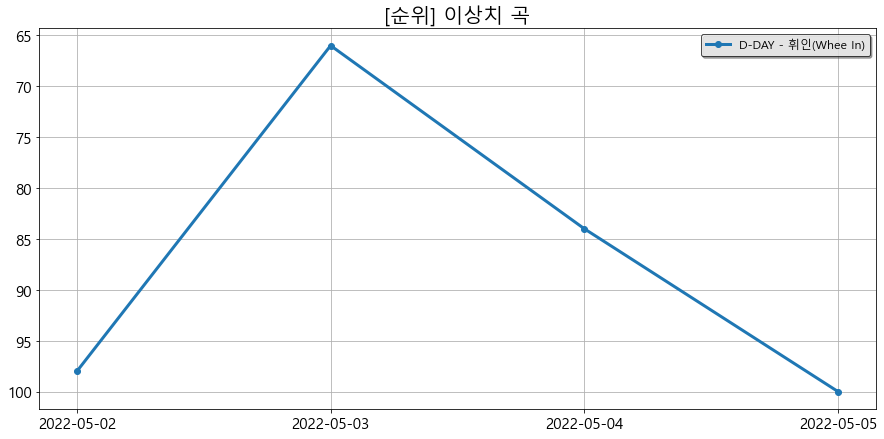

In [236]:
num = 5
for i in range( math.ceil(len(mod_big_change_title_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for j in range( len(mod_big_change_title_list[i*num:(i+1)*num]) ):
        temp = total_df[ (total_df['곡'] == mod_big_change_title_list[j]) & (total_df['가수'] == mod_big_change_artist_list[j])].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ' - ' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

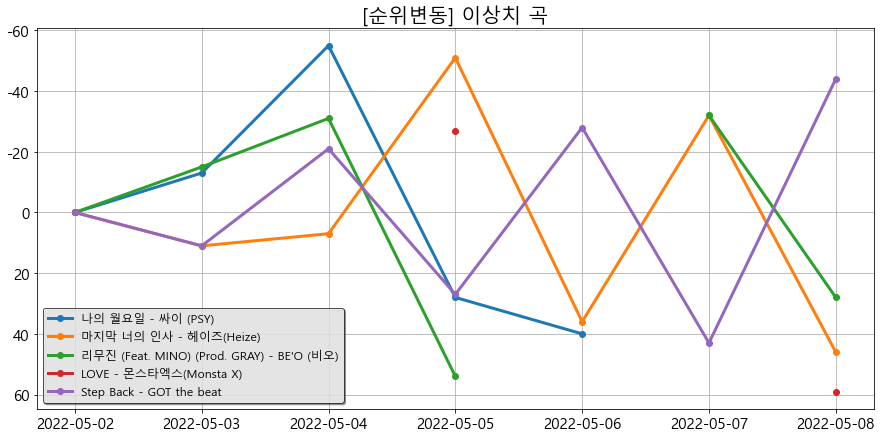

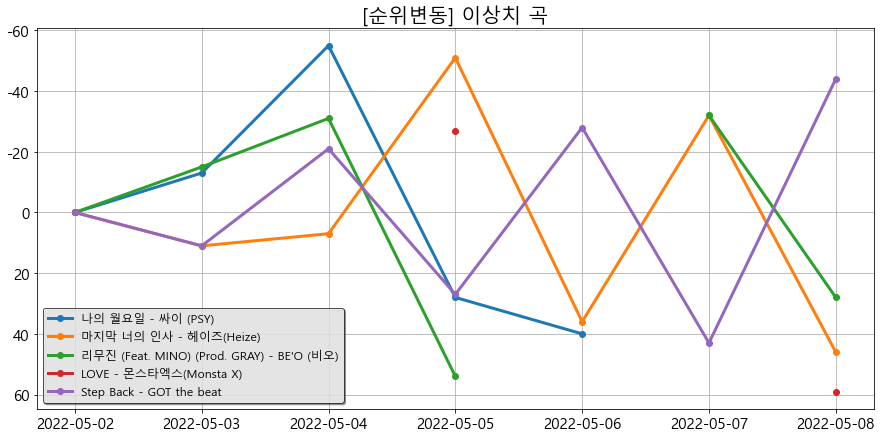

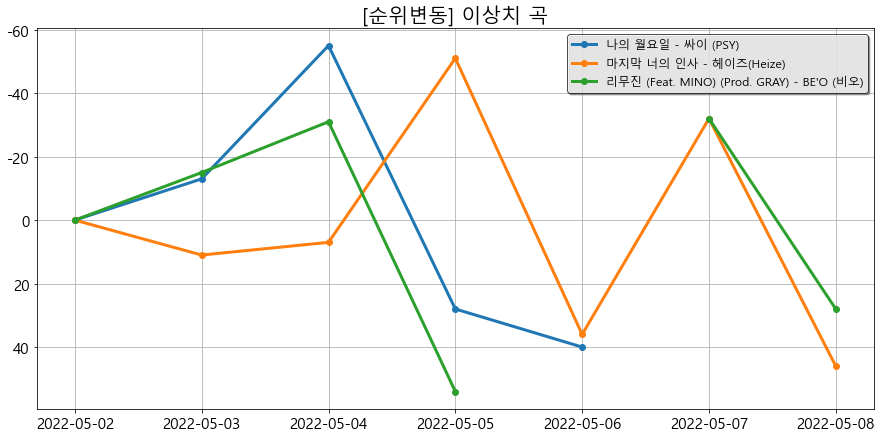

In [148]:
num = 5
for i in range( math.ceil(len(big_change_title_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for j in range( len(big_change_title_list[i*num:(i+1)*num]) ):
        temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ' - ' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [161]:
try:
    os.chdir(code_path)
except:
    pass

In [162]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [163]:
start_date, end_date

('2022-05-02', '2022-05-08')

In [164]:
temp['곡'].unique()[0].replace(' ', '_')

'나의_월요일'

In [165]:
for j in range(len(big_change_title_list)):
    temp = total_df[ (total_df['곡'] == big_change_title_list[j]) & (total_df['가수'] == big_change_artist_list[j])].reset_index(drop=True)
    title = temp['곡'].value_counts().index[0]
    artist = temp['가수'].value_counts().index[0]
    
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(title)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = temp['가수'].unique()[0].replace(' ', '_')
    search_title = temp['곡'].unique()[0].replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}-{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_13308/2122951776.py:13: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_13308/2122951776.py:22: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [166]:
driver.quit()

### 파일 이동

In [167]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [168]:
os.listdir()

['(주)원트리즈뮤직 비상연락망 (220510).xlsx',
 '(주)원트리즈뮤직_휴가계(양식).doc',
 'Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'D2Coding.ttf',
 'datalab_plots_20220509',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 '[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130809_Bad_Habits-Ed_S

In [169]:
csv_file_list = glob.glob('*.csv')
csv_file_list

['[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130809_Bad_Habits-Ed_Sheeran(에드_시런).csv']

In [170]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/bugs/'

In [171]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

### 이상치 노래 그래프

In [172]:
try:
    os.chdir(path)
except:
    pass

In [173]:
os.listdir()

['[bugs]2022-05-02_2022-05-08_[순위]이상치1.png',
 '[bugs]2022-05-02_2022-05-08_[순위]이상치2.png',
 '[bugs]2022-05-02_2022-05-08_[순위]이상치3.png',
 '[bugs]2022-05-02_2022-05-08_[순위변동]이상치1.png',
 '[bugs]2022-05-02_2022-05-08_[순위변동]이상치2.png',
 '[bugs]2022-05-02_2022-05-08_[순위변동]이상치3.png',
 '[bugs]20220502_20220508_mean_outliers.xlsx',
 '[bugs]20220502_20220508_outliers.xlsx',
 '[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130

In [174]:
goo_file_list = glob.glob('*.csv')
goo_file_list

['[bugs]20220511_130633_나의_월요일-싸이_(PSY).csv',
 '[bugs]20220511_130641_마지막_너의_인사-헤이즈(Heize).csv',
 "[bugs]20220511_130649_리무진_(Feat._MINO)_(Prod._GRAY)-BE'O_(비오).csv",
 '[bugs]20220511_130657_LOVE-몬스타엑스(Monsta_X).csv',
 '[bugs]20220511_130704_Step_Back-GOT_the_beat.csv',
 '[bugs]20220511_130712_꽃_길-BIGBANG_(빅뱅).csv',
 '[bugs]20220511_130720_모든_날,_모든_순간_(Every_day,_Every_Moment)-폴킴(Paul_Kim).csv',
 '[bugs]20220511_130728_사랑인가_봐_(Acoustic_Ver.)-김세정.csv',
 '[bugs]20220511_130736_무지개-임영웅.csv',
 '[bugs]20220511_130744_아버지-임영웅.csv',
 '[bugs]20220511_130752_사랑해_진짜-임영웅.csv',
 '[bugs]20220511_130800_언제나_사랑해-케이시.csv',
 '[bugs]20220511_130809_Bad_Habits-Ed_Sheeran(에드_시런).csv']

# 코드 마지막